Functional Programming

In [1]:
import numpy as np
def stats(data):
  
  mean = np.mean(data)
  sd = np.std(data)
  n = len(data)
  return mean, sd, n

In [2]:
test_data = [5.99342831, 4.7234714, 6.29537708, 8.04605971, 4.53169325, 
        4.53172609, 8.15842563, 6.53486946, 4.06105123, 6.08512009]
print(stats(test_data))

(5.896122225000001, 1.3718118594538566, 10)


Statistics

In [3]:
import scipy.stats

In [4]:
def ztest(test_data, threshold):
  mean, sd, n = stats(test_data)
  z = (mean - threshold)/(sd/(n**0.5))
  p_value = scipy.stats.norm.sf(abs(z))
  return p_value

In [5]:
ztest(test_data, 4)

6.186514647304359e-06

Object Oriented Programming

In [6]:
import pandas as pd

In [7]:
class geneCSV():
  def __init__(self, csvPath):
    geneMatrix = pd.read_csv(csvPath)
    geneMatrix.set_index('Unnamed: 0', inplace=True)
    self.geneMatrix = geneMatrix
    
  def z_test(self, gene, threshold):
    mean, sd, n = stats(gene)
    z = (mean - threshold)/(sd/(n**0.5))
    pvalue = scipy.stats.norm.sf(abs(z))
    return pvalue, (pvalue < .05)
    
  def geneTest(self):
    p_values = []
    good_values = []
    for index, row in self.geneMatrix.iterrows():
      p_value, expression = self.z_test(row, 4)
      p_values.append(p_value)
      good_values.append(expression)
    return p_values, good_values

In [8]:
gene = geneCSV('./1_c_d.csv')
p_values, good_values = gene.geneTest()
print(p_values)
print(good_values)

[0.017855178305570995, 5.105090338370288e-16, 6.278575365725075e-11, 1.2232713129707635e-13, 0.0011192020906575233, 0.44434202153334834, 1.019375174316386e-87, 9.958526584143226e-57]
[True, True, True, True, True, False, True, True]


Plotting

In [9]:
import matplotlib.pyplot as plt

In [10]:
def scatterplot(geneListA, geneListB):
  plt.scatter(geneListA, geneListB)
  plt.show()

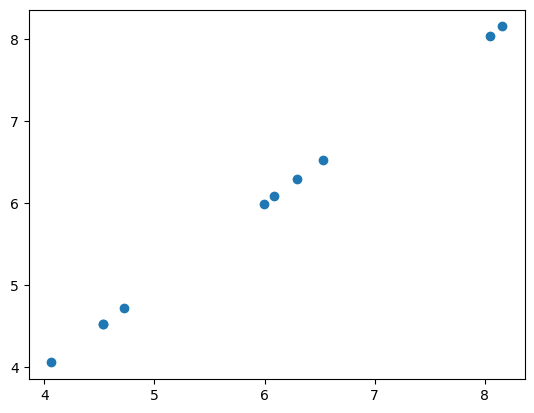

In [11]:
scatterplot(test_data, test_data)

Bonus Questions

Machine learning

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
test_data_2a = pd.read_csv('2_a.csv')

In [14]:
test_data_2a.head()

,1:ALL,0.561549117,0.213566469,-0.636584194,0.34712398,0.545508929,1.720234943,1.855733316,1.800898906,0.109674775,...,0.046676217,0.126566848,0.61284668,0.443501521,0.859034625,-0.672449451,0.150162632,0.068992444,0.129262921,-0.533469501
0,2:ALL,-0.623141,-0.912107,-0.465296,-0.734345,-0.539898,0.000112,-0.717583,0.733661,0.018900,...,-0.180749,-0.146952,-0.453801,-0.527682,-0.457939,0.412000,0.392065,0.054326,0.007136,-1.148372
1,3:ALL,-0.814524,-1.084069,-0.583127,1.785912,1.445064,1.099342,1.111595,1.178676,-0.193477,...,-0.813904,0.620945,1.117184,1.572018,-0.355646,0.921390,-1.207114,0.479036,1.546484,-0.391755
2,4:ALL,0.229492,-0.965719,-0.525060,-0.188016,-0.534603,1.177447,1.057922,1.126832,0.289006,...,0.549908,-1.229743,0.739719,0.115690,-0.110720,0.581664,-1.001332,-0.197117,-0.990989,-0.924845
3,5:ALL,-0.706016,0.660884,-0.548306,-0.702840,-0.285707,0.428307,1.144897,-0.180164,0.194169,...,-1.211262,-1.909517,-1.208151,-1.095057,-0.391334,-0.023814,0.639460,-1.816627,0.140519,-1.194537
4,6:ALL,-0.314779,0.541182,-0.156431,0.446234,-0.204271,1.189380,1.271855,1.196415,0.701939,...,-0.474979,-0.031793,-0.909759,0.993688,0.796192,1.820972,-0.730801,0.165411,0.677180,-0.247391


In [15]:
test_data_2a.rename(columns = {'1:ALL' : 'Subtype'}, inplace=True)

In [16]:
test_data_2a

,Subtype,0.561549117,0.213566469,-0.636584194,0.34712398,0.545508929,1.720234943,1.855733316,1.800898906,0.109674775,...,0.046676217,0.126566848,0.61284668,0.443501521,0.859034625,-0.672449451,0.150162632,0.068992444,0.129262921,-0.533469501
0,2:ALL,-0.623141,-0.912107,-0.465296,-0.734345,-0.539898,0.000112,-0.717583,0.733661,0.018900,...,-0.180749,-0.146952,-0.453801,-0.527682,-0.457939,0.412000,0.392065,0.054326,0.007136,-1.148372
1,3:ALL,-0.814524,-1.084069,-0.583127,1.785912,1.445064,1.099342,1.111595,1.178676,-0.193477,...,-0.813904,0.620945,1.117184,1.572018,-0.355646,0.921390,-1.207114,0.479036,1.546484,-0.391755
2,4:ALL,0.229492,-0.965719,-0.525060,-0.188016,-0.534603,1.177447,1.057922,1.126832,0.289006,...,0.549908,-1.229743,0.739719,0.115690,-0.110720,0.581664,-1.001332,-0.197117,-0.990989,-0.924845
3,5:ALL,-0.706016,0.660884,-0.548306,-0.702840,-0.285707,0.428307,1.144897,-0.180164,0.194169,...,-1.211262,-1.909517,-1.208151,-1.095057,-0.391334,-0.023814,0.639460,-1.816627,0.140519,-1.194537
4,6:ALL,-0.314779,0.541182,-0.156431,0.446234,-0.204271,1.189380,1.271855,1.196415,0.701939,...,-0.474979,-0.031793,-0.909759,0.993688,0.796192,1.820972,-0.730801,0.165411,0.677180,-0.247391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,68:ALL,-0.047172,2.642169,-0.524362,0.081749,0.169043,-0.969494,-0.814526,-0.880525,-0.219941,...,-0.826626,-0.012862,-0.657862,-1.708188,0.189782,-0.656038,1.588991,-0.717467,-0.392787,-1.181221
67,69:ALL,-0.812292,-1.082064,2.774872,2.208582,1.540095,-1.005600,-0.853548,-0.920894,-0.112483,...,-0.640825,-0.662990,0.046307,-0.555856,0.303854,-0.424722,1.018188,-0.184504,-0.584985,-1.162590
68,70:ALL,0.013516,1.817207,0.172399,0.429806,-0.508952,1.758551,1.713289,2.039061,0.758829,...,0.304367,-0.960789,-1.459076,-0.475334,0.949969,-0.692449,0.108456,-0.686493,-0.247054,-0.143712
69,71:ALL,-0.353390,0.063489,-0.195105,-0.101432,0.414814,-0.878322,-0.715992,-0.778591,-0.693593,...,0.335695,-0.044789,0.204415,-0.552234,1.258768,0.855651,-0.486112,-0.873851,-0.258038,-0.998107


In [17]:
for index, row in test_data_2a.iterrows():
  if 'ALL' in row['Subtype']:
    test_data_2a.loc[index, 'Subtype'] = 'ALL'
  else:
    test_data_2a.loc[index, 'Subtype'] = 'AML'

In [18]:
test_data_2a.head()

,Subtype,0.561549117,0.213566469,-0.636584194,0.34712398,0.545508929,1.720234943,1.855733316,1.800898906,0.109674775,...,0.046676217,0.126566848,0.61284668,0.443501521,0.859034625,-0.672449451,0.150162632,0.068992444,0.129262921,-0.533469501
0,ALL,-0.623141,-0.912107,-0.465296,-0.734345,-0.539898,0.000112,-0.717583,0.733661,0.018900,...,-0.180749,-0.146952,-0.453801,-0.527682,-0.457939,0.412000,0.392065,0.054326,0.007136,-1.148372
1,ALL,-0.814524,-1.084069,-0.583127,1.785912,1.445064,1.099342,1.111595,1.178676,-0.193477,...,-0.813904,0.620945,1.117184,1.572018,-0.355646,0.921390,-1.207114,0.479036,1.546484,-0.391755
2,ALL,0.229492,-0.965719,-0.525060,-0.188016,-0.534603,1.177447,1.057922,1.126832,0.289006,...,0.549908,-1.229743,0.739719,0.115690,-0.110720,0.581664,-1.001332,-0.197117,-0.990989,-0.924845
3,ALL,-0.706016,0.660884,-0.548306,-0.702840,-0.285707,0.428307,1.144897,-0.180164,0.194169,...,-1.211262,-1.909517,-1.208151,-1.095057,-0.391334,-0.023814,0.639460,-1.816627,0.140519,-1.194537
4,ALL,-0.314779,0.541182,-0.156431,0.446234,-0.204271,1.189380,1.271855,1.196415,0.701939,...,-0.474979,-0.031793,-0.909759,0.993688,0.796192,1.820972,-0.730801,0.165411,0.677180,-0.247391


In [19]:
X = test_data_2a.drop('Subtype', axis=1)
y = test_data_2a['Subtype']

In [20]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [21]:
pca = PCA(n_components=2)
X_pc = pca.fit_transform(X)

In [22]:
X_pc.shape

(71, 2)

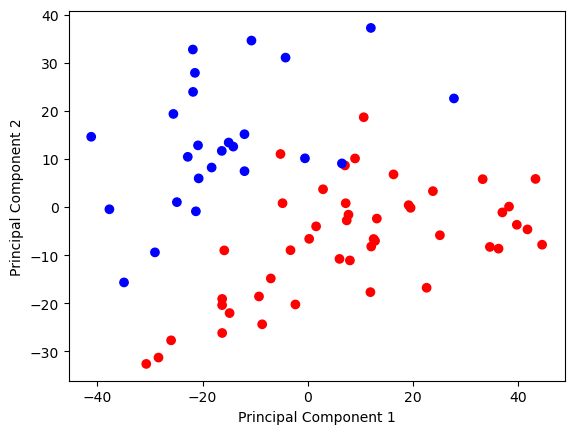

In [23]:
plt.scatter(X_pc[:,0], X_pc[:,1], c = ['red' if 'ALL' in subtype else 'blue'for subtype in y])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [24]:
pca.explained_variance_ratio_

array([0.13451067, 0.06907701])

In [109]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape

(47, 3571)

In [128]:
y_train_binary = y_train.apply(lambda x: 0 if x == 'AML' else 1)
y_test_binary = y_test.apply(lambda x: 0 if x == 'AML' else 1)

In [156]:
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train, y_train_binary)
pred = xgbc.predict(X_test)
accuracy_score(y_test_binary, pred>0.5)

0.9166666666666666

In [57]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn

KNeighborsClassifier()

In [153]:
scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
print(scores)

[1.         0.875      0.93333333]


Deep Learning/Pytorch for Image Classification

In [168]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization, Conv2D, MaxPool2D
from keras.losses import SparseCategoricalCrossentropy

In [161]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [165]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [200]:
fashion_model = Sequential([
  Flatten(input_shape=(28,28)),
  Dense(128, activation='relu'),
  Dense(10)
])

/Users/edwardkim/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [201]:
fashion_model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [202]:
history = fashion_model.fit(train_images, train_labels, epochs=10, validation_split=0.33)

Epoch 1/10
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7657 - loss: 0.6832 - val_accuracy: 0.8519 - val_loss: 0.4239
Epoch 2/10
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8548 - loss: 0.4118 - val_accuracy: 0.8554 - val_loss: 0.4046
Epoch 3/10
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8706 - loss: 0.3594 - val_accuracy: 0.8685 - val_loss: 0.3642
Epoch 4/10
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8786 - loss: 0.3317 - val_accuracy: 0.8718 - val_loss: 0.3590
Epoch 5/10
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8836 - loss: 0.3176 - val_accuracy: 0.8686 - val_loss: 0.3558
Epoch 6/10
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8906 - loss: 0.2931 - val_accuracy: 0.8715 - val_loss: 0.3592
Epoch 7/10
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8968 - loss: 0.2798 - val_accuracy: 0.8760 - val_loss: 0.3391
Epoch 8/10
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9020 - loss: 0.2605 - 

In [203]:
test_loss, test_acc = fashion_model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - 444us/step - accuracy: 0.8774 - loss: 0.3536


In [204]:
fashion_model.history.history.keys()

dict_keys([])

Text(0, 0.5, 'Loss')

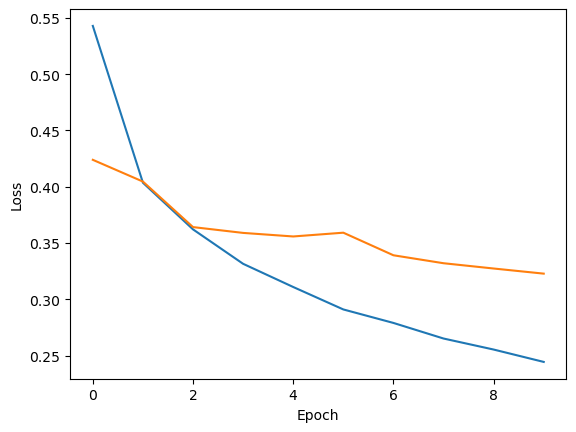

In [206]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')